In [1]:
import sys
import numpy as np
from spectres import spectres
from matplotlib import pyplot as plt
from astropy.io import fits
sys.path.append('aspired')

import aspired

In [2]:
# Example data from SPRAT
# LHS6328 companion WD
science_data = fits.open('examples/v_e_20180906_22_1_0_2.fits')[0].data

# Example data from SPRAT
# Hiltner102
standard_data = fits.open('examples/v_s_20180703_65_1_0_2.fits')[0].data

In [3]:
# Set the spectral and spatial direction
Saxis = 1
Waxis = 0

# initialise the two aspired.TwoDSpec()
lhs6328 = aspired.TwoDSpec(science_data, rn=10., cr=False, gain=1., seeing=1.2, display=True)
hilt102 = aspired.TwoDSpec(standard_data, rn=10., cr=False, gain=1., seeing=1.2, display=True)

Tracing Aperture using nsteps=20
Step 2 of 20 of spectrum 1 of 1 has a poor fit. Initial guess is used instead.
Step 3 of 20 of spectrum 1 of 1 has a poor fit. Initial guess is used instead.
Spectrum 1 : Trace gaussian width = [0.25013482 0.         0.         1.43984428 1.48343334 1.59310992
 1.51767397 1.49375878 1.48729472 1.4806177  1.45911217 1.44795614
 1.43007391 1.42885387 1.42052984 1.415245   1.42442227 1.35693878
 1.26265452 0.        ] pixels


aspired/aspired.py:635: RuntimeWarning: invalid value encountered in log10
  np.log10(self.img),


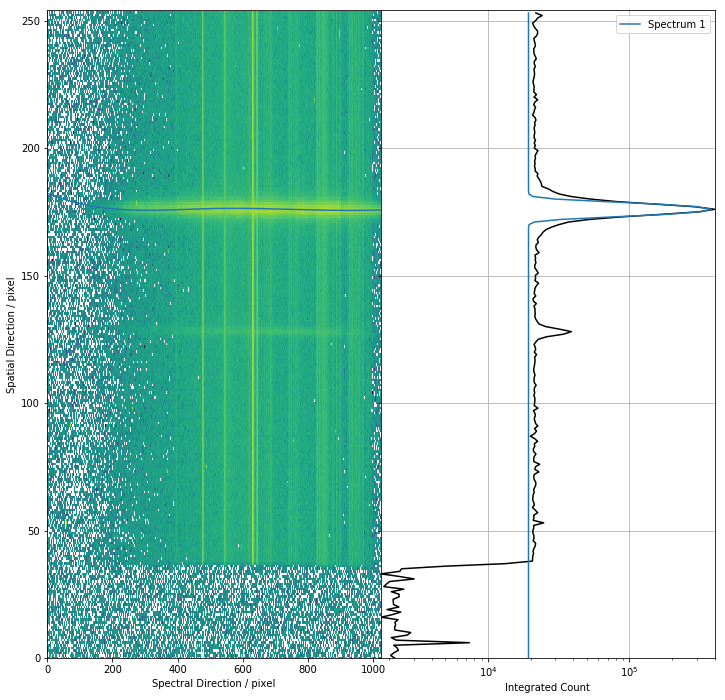

Tracing Aperture using nsteps=20
Spectrum 1 : Trace gaussian width = [1.16305774 2.3780273  1.91322568 1.50617596 1.31271928 1.24049416
 1.210595   1.19272211 1.18777476 1.18161836 1.18849211 1.19483529
 1.2059558  1.22018269 1.23865212 1.25978794 1.28502279 1.36148972
 1.36101352 0.        ] pixels


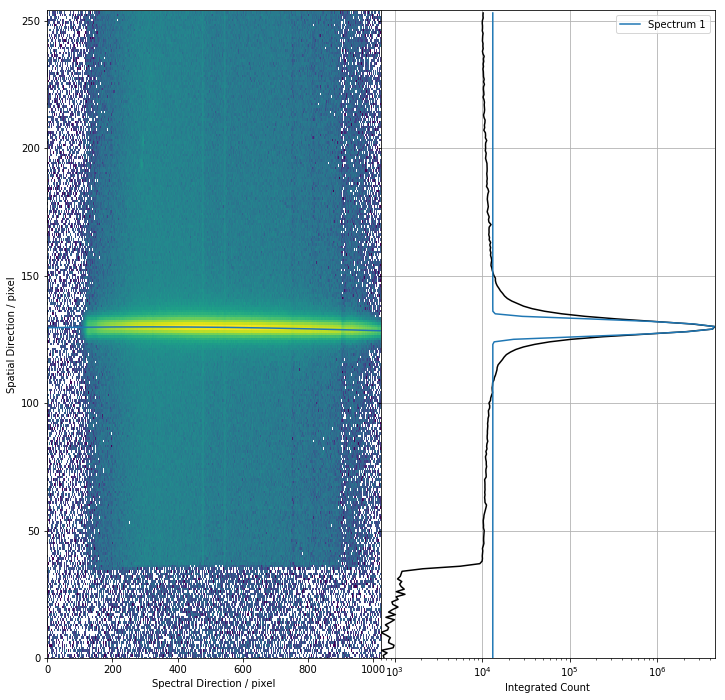

In [4]:
# automatically trace the spectrum
lhs6328.ap_trace(nsteps=20, recenter=False, prevtrace=(0, ), fittype='spline', bigbox=8)
hilt102.ap_trace(nsteps=20, recenter=False, prevtrace=(0, ), fittype='spline', bigbox=8)

aspired/aspired.py:509: RuntimeWarning: invalid value encountered in double_scalars
  np.sum((P**2. / var0)[mask_cr])
aspired/aspired.py:511: RuntimeWarning: divide by zero encountered in double_scalars
  variance1 = 1. / np.sum((P**2. / var1)[mask_cr])
aspired/aspired.py:515: RuntimeWarning: invalid value encountered in double_scalars
  ((variance1 - variance0) / variance1 > 0.001)):
aspired/aspired.py:978: RuntimeWarning: invalid value encountered in log10
  min(median_trace+widthup+skysep+skywidth, len(self.img[0])), :]),


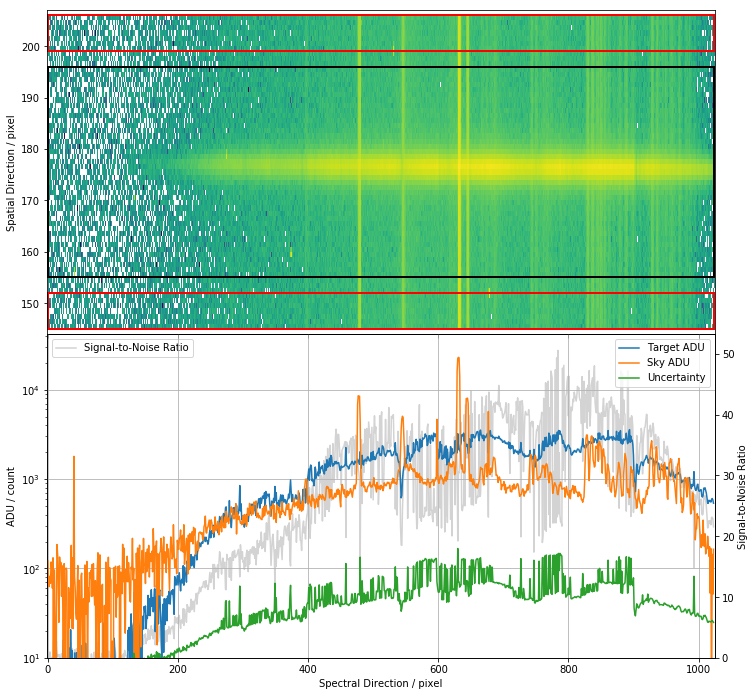

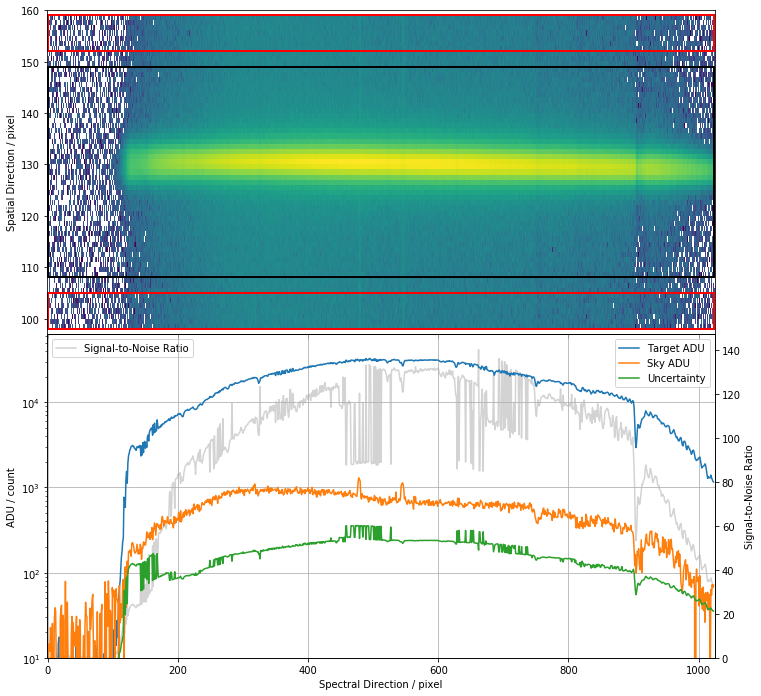

In [5]:
# Optimal extracting spectrum by summing over the aperture along the trace
lhs6328.ap_extract(apwidth=20)
hilt102.ap_extract(apwidth=20)

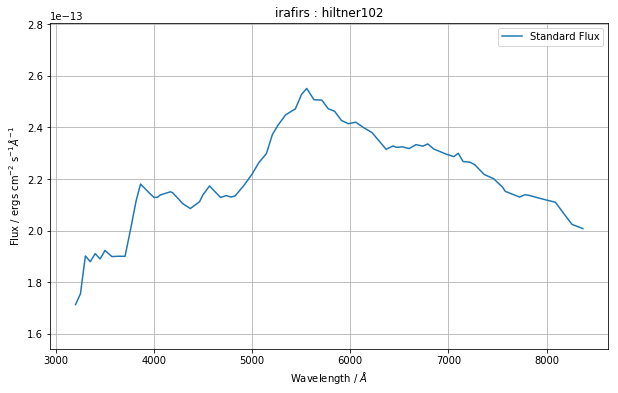

In [6]:
fluxcal = aspired.StandardFlux(target='hiltner102', group='irafirs', cutoff=0.4, ftype='flux')
fluxcal.load_standard()
fluxcal.inspect_standard()

In [7]:
# Placeholder of wavelength calibration
wavecal = type('', (), {})()
wavecal.pfit_type = 'poly'
wavecal.pfit = [3.17707768e-07, -6.15874242e-04,  5.13807283e+00,  3.22724313e+03]


/Users/marcolam/git/SpectRes/spectres/spectral_resampling.py:74: UserWarning: spectres: Part of the new wavelengths specified is outside the range of the input data, they are filled with zeros.
  warnings.warn("spectres: Part of the new wavelengths specified is "
aspired/aspired.py:1422: RuntimeWarning: divide by zero encountered in true_divide
  sensitivity = flux_std_true / flux_std


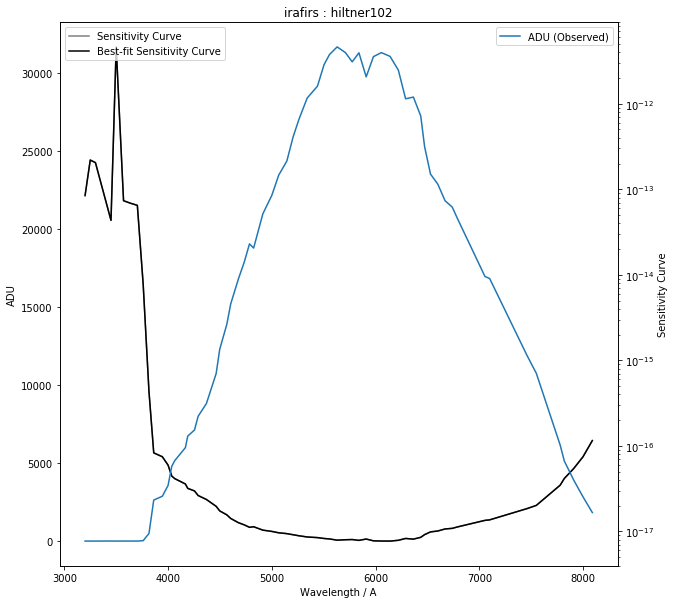

In [8]:
# Get the sensitivity curves
lhs6328_reduced = aspired.OneDSpec(lhs6328, wavecal, standard=hilt102, wave_cal_std=wavecal, flux_cal=fluxcal)
lhs6328_reduced.apply_wavelength_calibration('all')
lhs6328_reduced.compute_sencurve(kind='cubic')
lhs6328_reduced.inspect_sencurve()

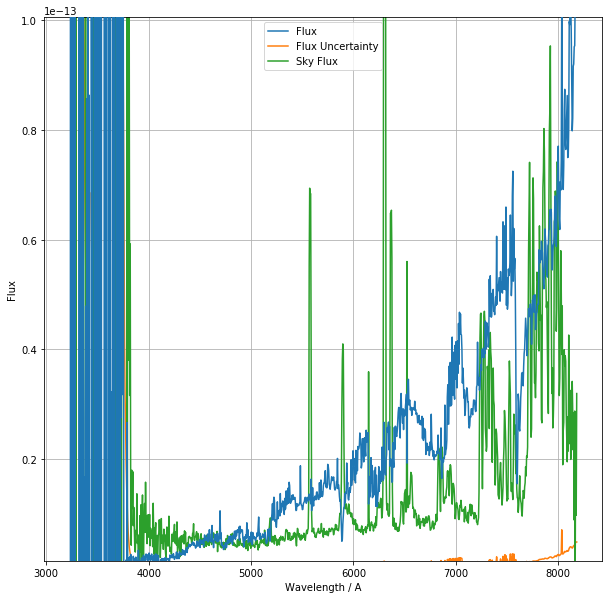

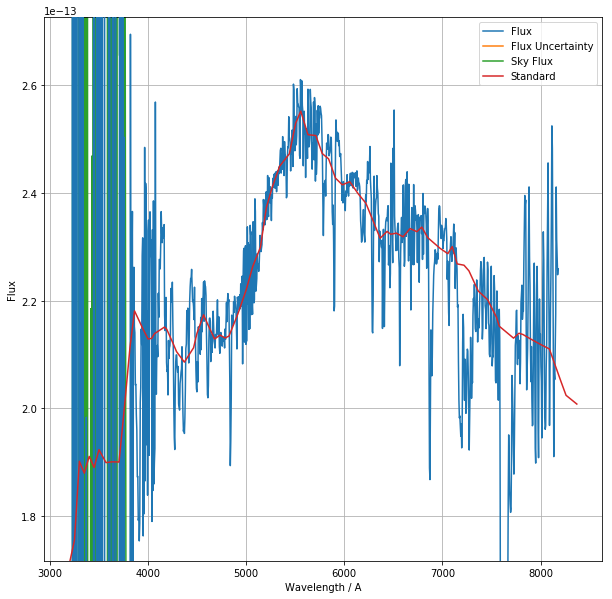

In [9]:
lhs6328_reduced.apply_flux_calibration('all')
lhs6328_reduced.inspect_reduced_spectrum('all')

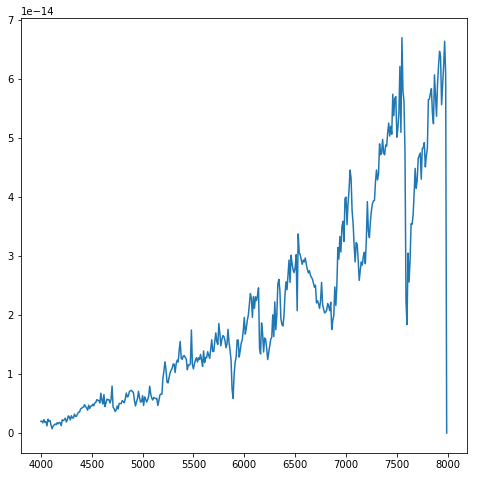

In [10]:
wave_lhs6328, flux_lhs6328 = lhs6328_reduced.wave, lhs6328_reduced.flux
wave = np.arange(4000.,8000.,10.)
flux = spectres(wave, wave_lhs6328, flux_lhs6328)
plt.figure(figsize=(8,8))
plt.plot(wave, flux)